Data table starts at line: 40
Raw shape: (736, 36)
     0          1          2          3          4          5    6    7   \
0  1765  277.01467  277.01467  278.05158  721.89411  272.95961  0.0  0.0   
1  1766  277.83880  277.81457  278.10615  722.25570  272.97121  0.0  0.0   
2  1767  278.69351  278.68732  278.22039  722.97082  272.99419  0.0  0.0   
3  1768  278.74752  278.83598  278.34305  723.66792  273.01678  0.0  0.0   
4  1769  278.79644  278.98880  278.47058  724.34313  273.03903  0.0  0.0   

     8    9   ...   26   27   28   29   30   31   32   33   34     35  
0  35.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  5.8  480.0  
1  35.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  5.8  480.0  
2  35.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  5.8  480.0  
3  35.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  5.8  480.0  
4  35.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  5.8  480.0  

[5 rows x 36 columns]
Columns found: 36
   Year        CO2


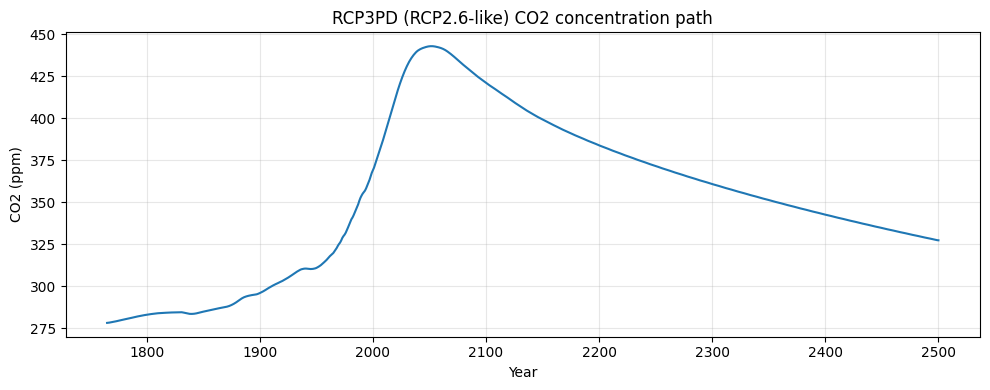

In [11]:
import re
import pandas as pd
from pathlib import Path

path = Path(r"..\1_DATA\1_RAW\RCP3PD_MIDYR_CONC\RCP3PD_MIDYR_CONC.DAT")

# --- 1) Find the first data line (starts with a 4-digit year) ---
start_row = None
with open(path, "r", encoding="utf-8", errors="ignore") as f:
    for i, line in enumerate(f):
        if re.match(r"^\s*\d{4}\s+", line):   # e.g., "1765  278.0 ..."
            start_row = i
            break

if start_row is None:
    raise ValueError("Could not find a line starting with a 4-digit year. Check file format manually.")

print("Data table starts at line:", start_row + 1)

# --- 2) Read numeric block (whitespace-separated) ---
df_rcp = pd.read_csv(
    path,
    sep=r"\s+",
    engine="python",
    skiprows=start_row,
    header=None
)

print("Raw shape:", df_rcp.shape)
print(df_rcp.head())
expected_cols = 36
print("Columns found:", df_rcp.shape[1])

if df_rcp.shape[1] != expected_cols:
    print("⚠️ Column count not equal to 36. We'll still name the first columns safely.")
    
colnames = [
    "Year",
    "CO2EQ",
    "KYOTO_CO2EQ",
    "CO2",
    "CH4",
    "N2O",
    "FGASSUMHFC134AEQ",
    "MHALOSUMCFC12EQ",
] + [f"Gas_{i}" for i in range(8, df_rcp.shape[1])]  # generic for remaining

df_rcp.columns = colnames[:df_rcp.shape[1]]

# Convert Year to int (safe)
df_rcp["Year"] = df_rcp["Year"].astype(int)

print(df_rcp[["Year", "CO2"]].head())
df_co2 = df_rcp[["Year", "CO2"]].rename(columns={"CO2": "CO2_ppm"}).copy()
df_co2 = df_co2.sort_values("Year").reset_index(drop=True)

print(df_co2.head())
print(df_co2.tail())
df_co2_2019_2100 = df_co2[(df_co2["Year"] >= 2019) & (df_co2["Year"] <= 2100)].copy()
print(df_co2_2019_2100.shape)
print(df_co2_2019_2100.head())
df_co2 = df_rcp[["Year", "CO2"]].rename(columns={"CO2": "CO2_ppm"}).copy()
df_co2 = df_co2.sort_values("Year").reset_index(drop=True)

df_rcp2100 = df_co2[(df_co2["Year"] >= 2019) & (df_co2["Year"] <= 2100)].copy()

df_co2_2019_2100 = df_co2[(df_co2["Year"] >= 2019) & (df_co2["Year"] <= 2100)].copy()
print(df_co2_2019_2100.shape)
print(df_co2_2019_2100.head())
df_co2 = df_rcp[["Year", "CO2"]].rename(columns={"CO2": "CO2_ppm"}).copy()
df_co2 = df_co2.sort_values("Year").reset_index(drop=True)

df_rcp2100 = df_co2[(df_co2["Year"] >= 2019) & (df_co2["Year"] <= 2100)].copy()
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(df_co2["Year"], df_co2["CO2_ppm"])
plt.title("RCP3PD (RCP2.6-like) CO2 concentration path")
plt.xlabel("Year")
plt.ylabel("CO2 (ppm)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



In [14]:
PPM_TO_GTC = 2.12

df_rcp2100["dCO2_ppm"] = df_rcp2100["CO2_ppm"].diff()
df_rcp2100["G_ATM_rcp_GtC"] = PPM_TO_GTC * df_rcp2100["dCO2_ppm"]
df_rcp2100[["Year","CO2_ppm","dCO2_ppm","G_ATM_rcp_GtC"]].head(10)


,Year,CO2_ppm,dCO2_ppm,G_ATM_rcp_GtC
254,2019,409.80029,NaN,NaN
255,2020,412.06783,2.26754,4.807185
256,2021,414.32565,2.25782,4.786578
257,2022,416.51662,2.19097,4.644856
258,2023,418.60322,2.08660,4.423592
259,2024,420.60132,1.99810,4.235972
260,2025,422.51575,1.91443,4.058592
261,2026,424.34901,1.83326,3.886511
262,2027,426.09675,1.74774,3.705209
263,2028,427.75232,1.65557,3.509808


In [15]:
df_rcp2100

,Year,CO2_ppm,dCO2_ppm,G_ATM_rcp_GtC
254,2019,409.80029,NaN,NaN
255,2020,412.06783,2.26754,4.807185
256,2021,414.32565,2.25782,4.786578
257,2022,416.51662,2.19097,4.644856
258,2023,418.60322,2.08660,4.423592
...,...,...,...,...
331,2096,422.92945,-0.50113,-1.062396
332,2097,422.42761,-0.50184,-1.063901
333,2098,421.91753,-0.51008,-1.081370
334,2099,421.40111,-0.51642,-1.094810


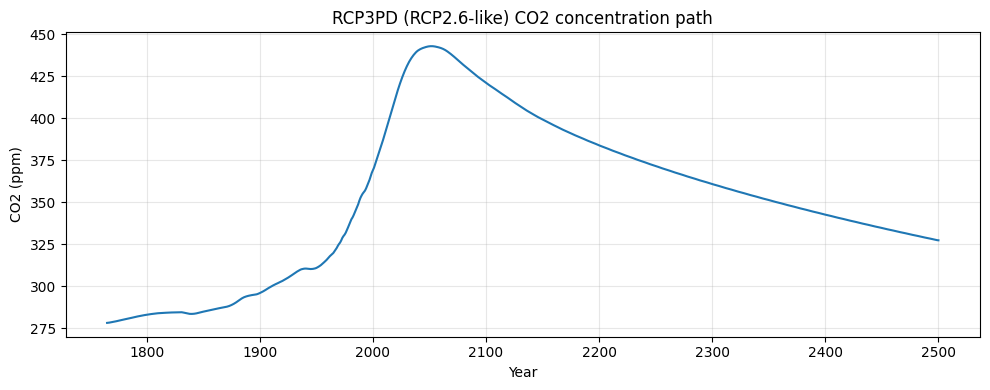